In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

In [38]:
hazards = ['Drought', 'Eviction', 'Conflict', 'Flood', 'Other']

In [39]:
hazard_colours = {
'Conflict':  "#F8766D",    
'Drought': "#A3A500",
'Eviction': "#00BF7D",
'Flood': "#00B0F6",
'Other': "#E76BF3"
}


#["#F8766D", "#A3A500", "#00BF7D", "#00B0F6", "#E76BF3"]

In [40]:
dummy_data = pd.DataFrame.from_records([
    {'flood': .3, 'drought': .1, 'fire': .6},
    {'flood': .4, 'drought': .5, 'fire': .1},
    {'flood': .1, 'drought': .1, 'fire': .8}
])

dummy_data = dummy_data.stack().reset_index(name='probability').rename({'level_0': 'src_node', 'level_1': 'hazard'}, axis=1)

In [41]:
source_hazards_data = pd.read_csv('./source_hazards_dist.csv', index_col=0)

In [42]:
source_hazards_data

,Drought,Eviction,Conflict,Flood,Other
0,0.000000,0.0,0.000000,1.0,0.0
1,1.000000,0.0,0.000000,0.0,0.0
2,0.982904,0.0,0.017096,0.0,0.0
3,0.998476,0.0,0.001524,0.0,0.0
4,1.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...
3176,0.000000,0.0,1.000000,0.0,0.0
3177,1.000000,0.0,0.000000,0.0,0.0
3178,0.808524,0.0,0.191476,0.0,0.0
3179,1.000000,0.0,0.000000,0.0,0.0


In [43]:
data = source_hazards_data
data = data.stack().reset_index(name='probability').rename({'level_0': 'src_node', 'level_1': 'hazard'}, axis=1)

In [44]:
data

,src_node,hazard,probability
0,0,Drought,0.0
1,0,Eviction,0.0
2,0,Conflict,0.0
3,0,Flood,1.0
4,0,Other,0.0
...,...,...,...
15885,3180,Drought,1.0
15886,3180,Eviction,0.0
15887,3180,Conflict,0.0
15888,3180,Flood,0.0


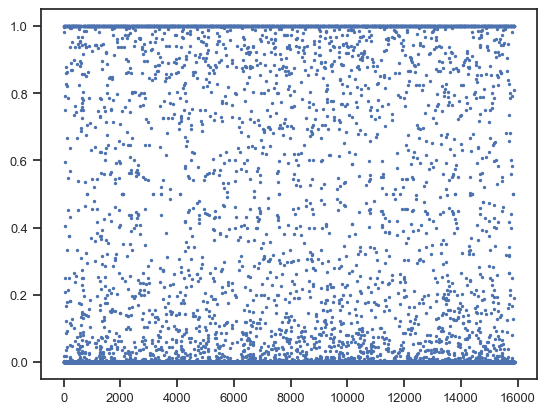

In [45]:
plt.scatter(range(data.shape[0]), data['probability'], s=2)

<timed exec>:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.


CPU times: user 1.08 s, sys: 18.8 ms, total: 1.09 s
Wall time: 465 ms


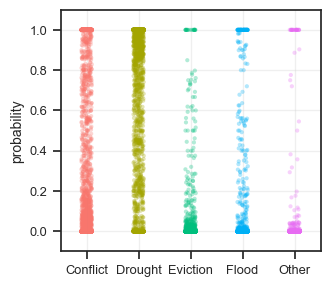

In [46]:
%%time

sns.set_theme(
    style='ticks',
    rc={'patch.edgecolor': 'none'},
    font='Arial',
    font_scale=.84
)

cm = 1/2.54 
fig, ax = plt.subplots(1, figsize=(8.1*cm, 7*cm), constrained_layout=True)

sns.stripplot(
    ax=ax, y='probability', x='hazard', data=data, orient='v', size=3, 
    legend=False, palette=sns.color_palette([hazard_colours[hazard] for hazard in sorted(hazards)], len(hazard_colours)),
    order=sorted(hazards), alpha=.3
)

ax.set_xlabel('')
ax.grid('on', alpha=.3)


ax.set_ylim(-.1, 1.1)

# fig.legend(handles=[
#     mpl.lines.Line2D([], [], color='w', marker='o', markerfacecolor='tab:blue', label='source point')]
# , bbox_to_anchor=(1,1.1))

#fig.suptitle('Which hazards are found along the path?')

# fig.savefig('../figs/strip.pdf', dpi=300)
fig.savefig('../figs/strip.png', dpi=600)

- Make color meaningful? — e.g. alpha or transparency or brightness depending on... path length?


# Sequence plot

In [63]:
hazards_data = pd.read_csv('./hazards_dist_time_uniform.csv', index_col=0)

In [64]:
hazards_data

,Drought,Eviction,Conflict,Flood,Other
0,0.672430,0.017605,0.257466,0.037410,0.015090
1,0.884942,0.016347,0.087708,0.009117,0.001886
2,0.961019,0.002201,0.029236,0.007545,0.000000
3,0.968878,0.001257,0.023577,0.006287,0.000000
4,0.984282,0.000000,0.012260,0.003458,0.000000


In [57]:
dummy_data = pd.DataFrame.from_records([
    {'Drought': .3, 'Eviction': .1, 'Conflict': .6},
    {'Drought': .4, 'Eviction': .5, 'Conflict': .1},
    {'Drought': .1, 'Eviction': .1, 'Conflict': .8},
    {'Drought': .1, 'Eviction': .1, 'Conflict': .8},
    {'Drought': .1, 'Eviction': .1, 'Conflict': .8}
])

dummy_data['Flood'] = 0
dummy_data['Other'] = 0
#data.index.name = 'timestep'

#data = data.reindex(pd.MultiIndex.from_product(itertools.product(list(range(5)), hazards)))

#data = data.stack().reset_index(name='probability').rename({'level_0': 'step', 'level_1': 'hazard'}, axis=1)

In [58]:
dummy_data

,Drought,Eviction,Conflict,Flood,Other
0,0.3,0.1,0.6,0,0
1,0.4,0.5,0.1,0,0
2,0.1,0.1,0.8,0,0
3,0.1,0.1,0.8,0,0
4,0.1,0.1,0.8,0,0


In [59]:
data = hazards_data

In [60]:
data

,Drought,Eviction,Conflict,Flood,Other
0,0.672430,0.017605,0.257466,0.037410,0.015090
1,0.884942,0.016347,0.087708,0.009117,0.001886
2,0.961019,0.002201,0.029236,0.007545,0.000000
3,0.968878,0.001257,0.023577,0.006287,0.000000
4,0.984282,0.000000,0.012260,0.003458,0.000000


In [61]:
cmap = mpl.colors.ListedColormap([hazard_colours[key] for key in hazards])

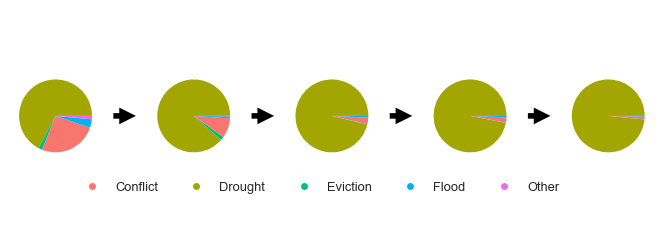

In [65]:
sns.set_theme(
    style='ticks',
    rc={'patch.edgecolor': 'none'},
    font='Arial',
    font_scale=.84
)

n_steps = data.shape[0]# 5
colours = cmap(np.arange(len(hazards)))


cm = 1/2.54 
fig, axs = plt.subplots(nrows=1, ncols=2*n_steps-1, figsize=(21.1*cm, 7*cm), width_ratios=(n_steps-1)*[.8,.2] + [.8])

for idx, ax in enumerate(axs.ravel()):
    if idx % 2 == 0:
        row_idx = int(idx / 2)
        ax.pie(data.loc[row_idx], colors=colours)
        #ax.set_title(f"XXX nodes finish\nat step {row_idx}")

    else: 
        ax.annotate('', xy=(1, .5), xytext=(0, .5),
            arrowprops=dict(facecolor='black', shrink=5e-3, lw=5e-3))    

    ax.axis('off')

fig.legend(handles=[mpl.lines.Line2D([], [], color='w', marker='o', markerfacecolor=hazard_colours[hazard], label=hazard) 
                    for hazard in sorted(hazards)], bbox_to_anchor=(.8,.3),  ncol=len(hazards), frameon=False)

# fig.savefig('../figs/pacman.pdf', dpi=300)